<a href="https://colab.research.google.com/github/pallavmarch/Psychologytoday-therapist-analysis/blob/main/PsychologyToday_Dementia_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import files


!pip install pgeocode
import pgeocode

pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
df=pd.read_csv("/content/therapists_profiles_data_Texas.csv",encoding='latin-1')
df.shape

(9078, 30)

In [4]:
df[df['Name'] == 'Kathy Lee Siepker']

,Profile URL,Name,Title,Location,State,ZIP Code,Phone,Individual Sessions ($),Couple Sessions ($),Pay By,Insurance,Top Specialties,Expertise,Types of Therapy,Personal Statement,Verified by Psychology Today,In Practice (years),Membership,Certificate,Attended University,Major/Degree,Graduation Year,Qualifications,Endorsement Count,Endorsed By,Age,Participants,Communities,Religion,I also speak
5743,https://www.psychologytoday.com/us/therapists/...,Kathy Lee Siepker,"Clinical Social Work/Therapist,PhD,LCSW,CDP","Flower Mound, TX 75028(214) 692-2076",TX,75028,(214) 692-2076,$150,$150,"ACH Bank transfer, American Express, Discover,...",Aetna | BlueCross and BlueShield | Carelon Beh...,Anxiety | Depression | Dementia,Career Counseling | Coping Skills | Emotional ...,Coaching | Cognitive Behavioral (CBT) | Cultur...,"I am a licensed clinical social worker, therap...",Yes,4,Not Found,National Council of Certified Dementia Practit...,The Ohio State University (PhD); Wash U (MSW),Social Work,2014,Verified byPsychology TodayLicensed by State o...,1,Jamie English - Clinical Social Work/Therapist...,Adults | Elders (65+),Individuals | Couples | Family,Bisexual Allied | Gay Allied | HIV / AIDS Alli...,Not Found,Korean


In [94]:
print(len(df[df['Location'].isnull()]))
df.dropna(subset=['Location'], inplace=True)
df = df.drop_duplicates(subset=['Profile URL'], keep='first')
df.shape

2


(9071, 30)

In [96]:
df['Age'] = df['Age'].replace({'Elders (65+)': 'Elders'})
df['Dementia'] = df['Expertise'].str.lower().str.contains('dementia') | df['Top Specialties'].str.lower().str.contains('dementia')
df['Autism'] = df['Expertise'].str.lower().str.contains('autism') | df['Top Specialties'].str.lower().str.contains('autism')
df['Depression'] = df['Expertise'].str.lower().str.contains('depression') | df['Top Specialties'].str.lower().str.contains('depression')
df['Elders (65+)']=df['Age'].str.lower().str.contains('elders')
df['ZIP Code']=df['ZIP Code'].astype(int)


columns_to_lower = ['Expertise', 'Title', 'Insurance', 'I also speak','Top Specialties','Certificate','Major/Degree','Types of Therapy','Membership']
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower().replace('not found', np.nan))

currency_columns = ["Individual Sessions ($)", "Couple Sessions ($)","In Practice (years)","Graduation Year"]
df[currency_columns] = (df[currency_columns].replace({'\$': '',  ',': '', 'Not Found': np.nan}, regex=True).apply(pd.to_numeric))
df[currency_columns] = df[currency_columns].replace({'\$': ''}, regex=True).apply(pd.to_numeric)


# FUNCTION

In [100]:
def plot_horizontalBar(column,title):

    plt.style.use("dark_background")
    plt.figure(figsize=(10, 5))

    # Create a horizontal bar chart
    ax = sns.barplot(
        y=column.index,
        x=column.values,
        palette="plasma"
    )

    # Add data labels to each bar
    for index, value in enumerate(column.values):
        ax.text(value + 0.5, index, str(value), color='white', fontsize=9, va='center')

    plt.title(title, fontsize=14, color='white')

    plt.xticks(color='white')
    plt.yticks(color='white')

    plt.show()

def plot_count_distribution(df, column_name, title):


    df[column_name] = df[column_name].fillna(0).astype(int)
    df = df[df[column_name] > 0]  # Remove zero values

    value_counts = df[column_name].dropna().value_counts().sort_index()


    plt.style.use("dark_background")
    plt.figure(figsize=(12, 6))


    ax = sns.barplot(
        x=value_counts.index.astype(str),
        y=value_counts.values,
        palette="coolwarm"
    )


    for index, value in enumerate(value_counts.values):
        ax.text(index, value + 0.5, str(value), color='white', fontsize=10, ha='center')


    plt.xlabel(column_name, fontsize=12, color='white')
    plt.ylabel("Count", fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white')


    plt.xticks(rotation=45, color='white')
    plt.yticks(color='white')


    plt.show()

# DEMENTIA

### Generating Dementia Dataset

In [101]:
Dementia=df[df['Dementia']==True]

Dementia=Dementia[['Name','Title', 'Location', 'ZIP Code', 'State',
       'Individual Sessions ($)', 'Couple Sessions ($)',
       'Insurance', 'Top Specialties', 'Expertise', 'Types of Therapy',
       'In Practice (years)', 'Membership', 'Certificate',
       'Major/Degree', 'Graduation Year', 'I also speak', 'Dementia','Elders (65+)']]

Dementia.size

4066

In [102]:
Dementia.to_csv('Dementia.csv')
files.download('Dementia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Upload Dementia Dataset

In [ ]:
Dementia.csv=pd.read_csv("/content/Dementia.csv")
Dementia.size

### Analyse

In [103]:
Dementia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 4 to 8978
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     214 non-null    object 
 1   Title                    213 non-null    object 
 2   Location                 214 non-null    object 
 3   ZIP Code                 214 non-null    int64  
 4   State                    214 non-null    object 
 5   Individual Sessions ($)  166 non-null    float64
 6   Couple Sessions ($)      93 non-null     float64
 7   Insurance                178 non-null    object 
 8   Top Specialties          195 non-null    object 
 9   Expertise                214 non-null    object 
 10  Types of Therapy         206 non-null    object 
 11  In Practice (years)      131 non-null    float64
 12  Membership               19 non-null     object 
 13  Certificate              71 non-null     object 
 14  Major/Degree             102 n

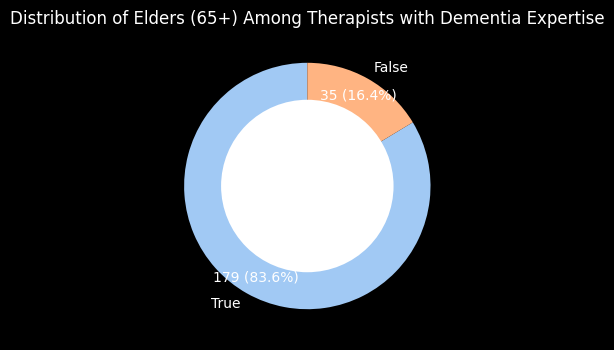

In [104]:
data = df[df['Dementia'] == True]['Elders (65+)'].value_counts()

labels = data.index
sizes = data.values
colors = sns.color_palette("pastel", len(labels))

fig, ax = plt.subplots(figsize=(4, 4))


wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, startangle=90, pctdistance=0.85, colors=colors,
    autopct=lambda p: f'{int(round(p * sum(sizes) / 100))} ({p:.1f}%)',
    textprops={'fontsize': 10}
)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

plt.title('Distribution of Elders (65+) Among Therapists with Dementia Expertise')
plt.show()

### Language

In [105]:
phrases_to_remove = [
    "se habla espaã±ol | ",
    "conversational ",
    "in spanish and urdu | "
]
pattern = '|'.join(map(re.escape, phrases_to_remove))

Dementia['I also speak'] = Dementia['I also speak'].str.replace(f"{pattern}|\\b(\\w+)\\s*\\|\\s*\\1\\b", r'\1', regex=True)
language_list = Dementia['I also speak'].dropna().str.split('|').explode().str.strip()
language_list=language_list[language_list != 'not found']
language_counts = language_list.value_counts()


<ipython-input-100-f421bec1e104>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


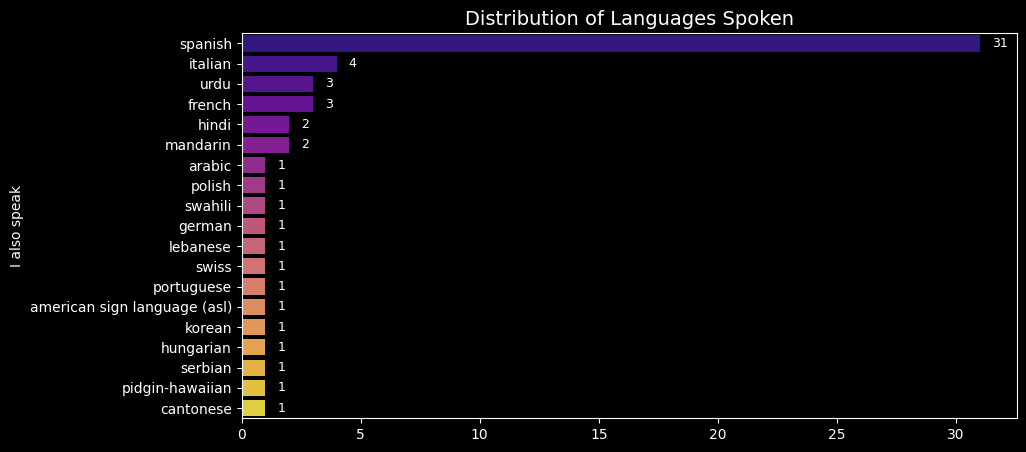

In [106]:
plot_horizontalBar(language_counts,"Distribution of Languages Spoken")
#Dementia[Dementia['I also speak'].str.lower().str.contains('spanish')]

### Insurance

<ipython-input-100-f421bec1e104>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


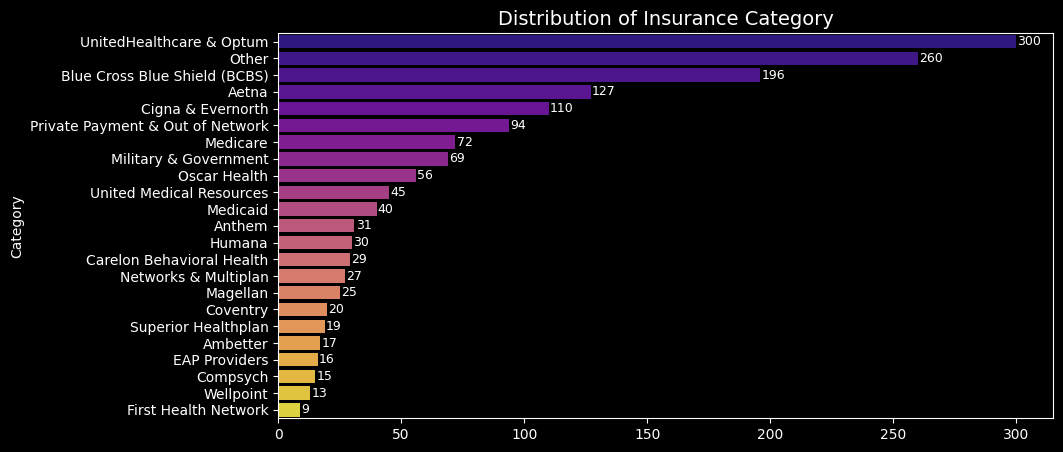

Category                          Insurance                                         
Aetna                             aetna                                                 125
                                  aetna cvshealth                                         1
                                  aetna eap                                               1
Ambetter                          ambetter                                               17
Anthem                            anthem                                                 31
Blue Cross Blue Shield (BCBS)     bcbs blue advantage hmo                                 1
                                  bcbs healthselect hmo                                   1
                                  bcbs ma                                                 1
                                  bcbs ppo                                                1
                                  blue cross                                             34
                                  blue shield                                            32
                                  bluecross and blueshield                              125
                                  horizon blue cross and blue shield                      1
Carelon Behavioral Health         carelon behavioral health                              29
Cigna & Evernorth                 cigna and evernorth                                   109
                                  cigna evernorth & eap                                   1
Compsych                          compsych                                               15
Coventry                          coventry                                               20
EAP Providers                     alliance work partners (eap)                            1
                                  anthem eap - bank of america                            1
                                  carebridge eap                                          1
                                  continuum eap                                           1
                                  eap: united health/optum                                3
                                  eap:cigna                                               5
                                  eap:united health/optum                                 3
                                  lyra eap                                                1
First Health Network              first health                                            7
                                  first health network                                    1
                                  preferred administrators                                1
Humana                            humana                                                 28
                                  humana eap                                              1
                                  humana tricare                                          1
Magellan                          magellan                                               25
Medicaid                          aetna medicaid                                          1
                                  bcbs medicaid, sendero                                  1
                                  cenpatico/superior/imhs/star health                     1
                                  chip/chip plus                                          1
                                  community first                                         1
                                  driscoll health plan                                    1
                                  humana - dual                                           3
                                  medicaid                                               26
                                  sendero health plans                                    1
                                  superior medicaid

In [107]:
Dementia['Insurance'] = Dementia['Insurance'].replace("allied benefit systems- aetna", "allied benefit systems | aetna", regex=False)

insurance_list = Dementia['Insurance'].dropna().str.split('|').explode().str.strip()

insurance_groups = {
    "Aetna": ["aetna", "aetna cvshealth", "aetna eap"],
    "Blue Cross Blue Shield (BCBS)": ["bluecross and blueshield", "blue cross", "blue shield", "horizon blue cross and blue shield",
                                       "blue cross blue shield of ma", "bcbs ppo", "bcbs ma", "bcbs blue advantage hmo", "bcbs healthselect hmo"],
    "Cigna & Evernorth": ["cigna and evernorth", "cigna evernorth & eap"],
    "UnitedHealthcare & Optum": ["unitedhealthcare uhc", "ubh", "optum", "united health/optum", "united healthcare optum & eap"],
    "Humana": ["humana", "humana eap", "humana tricare"],
    "Oscar Health": ["oscar health"],
    "United Medical Resources": ["united medical resources (umr)"],

    "Medicaid": ["aetna medicaid", "uhc medicaid", "medicaid", "superior medicaid", "chip/chip plus",
                 "bcbs medicaid, sendero", "cenpatico/superior/imhs/star health", "community first",
                 "driscoll health plan", "sendero health plans", "humana - dual", "united health/optum - medicaid"],


    "Medicare": ["medicare", "medicare (railroad)", "aetna medicare", "aetna - medicare", "uhc medicare", "humana medicare",
                 "humana - medicare", "united - medicare advantage", "scan medicare advantage",
                 "bcbs medicare advantage hmo", "bcbs medicare advantage ppo", "s&w medicare advantage", "united health/optum - medicare"],

    "EAP Providers": ["carebridge eap", "continuum eap", "alliance work partners (eap)", "united healthcare optum & eap",
                      "lyra eap", "anthem eap - bank of america", "eap:united health/optum", "eap: united health/optum", "eap:cigna"],
    "Military & Government": ["tricare", "tricare east out of network", "triwest", "champva", "us family health plan", "military onesource","government employees health association (geha)"],
    "Networks & Multiplan": ["multiplan", "multiplan private healthcare systems (phcs)", "multi plan phcs"],
    "First Health Network": ["first health", "first health network", "preferred administrators"],
    "Private Payment & Out of Network": ["out of network", "private payment", "i am an out of network provide"],
    "Anthem":["anthem"],
    "Carelon Behavioral Health": ["carelon behavioral health"],
    "Magellan":"magellan",
    "Coventry":"coventry",
    "Superior Healthplan": ["superior healthplan"],
    "Ambetter": ["ambetter"],
    "Compsych": ["compsych"],
    "Wellpoint": ["wellpoint"],
    "Not Found": ["not found"]
}


category_mapped = []


for insurance in insurance_list:
    found = False
    for category, providers in insurance_groups.items():
        if insurance in providers:
            category_mapped.append({"Insurance": insurance, "Category": category})
            found = True
            break
    if not found:
        category_mapped.append({"Insurance": insurance, "Category": "Other"})


insurance_mapping_df = pd.DataFrame(category_mapped)
inscount=insurance_mapping_df[['Category','Insurance']].value_counts().sort_index()

plot_horizontalBar(insurance_mapping_df['Category'].value_counts(),"Distribution of Insurance Category")
inscount

In [108]:
inscount.to_excel('inscount.xlsx')
files.download('inscount.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Title

<ipython-input-100-f421bec1e104>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


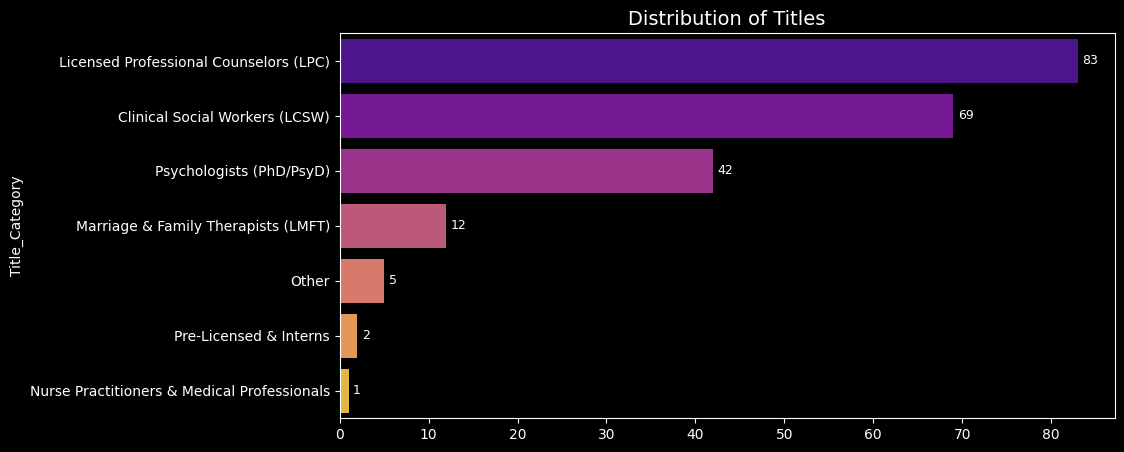

Title_Category                               Title_shorten                            
Clinical Social Workers (LCSW)               clinical social work/therapist               68
                                             master social worker                          1
Licensed Professional Counselors (LPC)       licensed professional counselor              72
                                             licensed professional counselor associate     8
                                             lpc associate                                 2
                                             lpc-associate                                 1
Marriage & Family Therapists (LMFT)          marriage & family therapist                  10
                                             marriage & family therapist associate         2
Nurse Practitioners & Medical Professionals  fnp                                           1
Other                                        counselor                                     1
                                             ms                                            2
                                             pmhnp                                         1
Pre-Licensed & Interns                       lpc intern                                    1
                                             pre-licensed professional                     1
Psychologists (PhD/PsyD)                     psychological associate                       2
                                             psychologist                                 40
Name: count, dtype: int64

In [109]:
Dementia['Title_shorten'] = Dementia['Title'].str.split('[,(]').str[0]
Dementia.insert(2, 'Title_shorten', Dementia.pop('Title_shorten'))


title_groups = {
    "Licensed Professional Counselors (LPC)": [
        "licensed professional counselor", "licensed professional counselor associate",
        "lpc intern", "lpc-associate", "lpc associate"
    ],
    "Clinical Social Workers (LCSW)": [
        "clinical social work/therapist", "master social worker"
    ],
    "Psychologists (PhD/PsyD)": [
        "psychologist", "psychological associate"
    ],
    "Marriage & Family Therapists (LMFT)": [
        "marriage & family therapist", "marriage & family therapist associate"
    ],
    "Nurse Practitioners & Medical Professionals": [
        "pmhnp(he", "fnp"
    ],
    "Pre-Licensed & Interns": [
        "pre-licensed professional", "lpc intern"
    ],
    "Other": [
        "ms", "counselor"
    ]
}

title_mapping = {title: category for category, titles in title_groups.items() for title in titles}


Dementia['Title_Category'] = Dementia['Title_shorten'].map(title_mapping).fillna("Other")


plot_horizontalBar(Dementia['Title_Category'].value_counts(),"Distribution of Titles")

Dementia[['Title_Category','Title_shorten']].value_counts().sort_index()

### pivot Table and graph

In [111]:
cols_to_clean = ['Individual Sessions ($)', 'Couple Sessions ($)', 'In Practice (years)']

Dementia[cols_to_clean] = (
    Dementia[cols_to_clean]
    .replace('Not Found', np.nan)
    .apply(lambda x: x.str.replace(r'[$ ]', '', regex=True).astype(float))
   # .astype('Int64')
)


value_counts_list = [
    Dementia[col].value_counts().astype(int).rename_axis(col).reset_index(name='Count')
    for col in cols_to_clean
]
side_by_side = pd.concat(value_counts_list, axis=1)


pivot_table1 = pd.pivot_table(Dementia,
                              values=cols_to_clean,
                              aggfunc=['mean', 'median', 'min', 'max', 'std', 'count', 'nunique', lambda x: x.isnull().sum()],
                              columns=['Dementia'],
                              dropna=True)

pivot_table1 = pivot_table1.applymap(lambda x: int(x) if not pd.isna(x) else x)
pivot_table1.style.background_gradient(cmap='Blues').format("{:.0f}")

AttributeError: Can only use .str accessor with string values!

### Expertise

In [112]:
expertise_list = Dementia['Expertise'].dropna().str.split('|').explode().str.strip()

expertise_groups = {
    "Anxiety, Mood, and Emotional Disorders": [
        "anxiety", "stress", "depression", "mood disorders",
        "obsessive-compulsive (ocd)", "impulse control disorders",
        "bipolar disorder", "personality disorders", "borderline personality (bpd)",
        "antisocial personality", "narcissistic personality (npd)", "psychosis",
        "emotional disturbance"
    ],
    "Trauma, PTSD, and Abuse": [
        "trauma and ptsd", "childhood trauma", "adjustment issues", "sexual abuse",
        "domestic violence", "domestic abuse", "military sexual trauma", "spiritual abuse/trauma",
        "religious trauma and abuse", "death and dying", "anticipatory grief", "traumatic bereavement & caregiving issue",
        "ptsd, geriatrics counseling", "veterans", "veteran transitions", "first responders"
    ],
    "Relationship & Family Issues": [
        "marital and premarital", "couples counseling", "peer relationships",
        "relationship issues", "divorce", "divorce adjustment, parental alienation",
        "parenting", "parent/child alienation and re-unification", "infidelity",
        "affair recovery", "boundaries, communication, life transitions"
    ],
    "LGBTQ+ & Gender Identity Issues": [
        "lgbtq+", "lesbian", "bisexual", "transgender", "lgbtqi",
        "gender identity", "heterosexual issues", "open relationships non-monogamy",
        "sex-positive, kink allied", "kink aware"
    ],
    "Addiction & Substance Use": [
        "addiction", "alcohol use", "substance use", "substance misuse", "gambling",
        "internet addiction", "video game addiction", "sex addiction",
        "spouses of sex addicts", "chronic impulsivity", "chronic relapse",
        "dual diagnosis", "medical detox"
    ],
    "Neurodevelopmental & Learning Disabilities": [
        "adhd", "autism", "intellectual disability", "asperger's syndrome",
        "developmental disorders", "education and learning disabilities", "testing and evaluation"
    ],
    "Dementia & Aging-Related Issues": [
        "dementia", "loved ones of dementia patients", "cognitive rehabilitation therapy",
        "neuropsychological assessment", "neuropsychological testing to rule out dementia",
        "brain injuries, dementia, epilepsy", "stroke", "functional neurological disorder (fnd)",
        "transition to aging and loss of independence", "eldercare/caregiver fatigue, retirement, aging",
        "aging and caregiving preparation", "preparation for retirement"
    ],
    "Chronic Illness & Pain Management": [
        "chronic illness", "chronic pain", "illness and disability", "autoimmune disease",
        "spinal cord", "complex/multiple medical conditions", "terminal/life-limiting illness", "terminal illness"
    ],
    "Workplace & Career Issues": [
        "career counseling", "occupational issues", "relationship at work and business",
        "mental health for business professionals", "workplace stress", "supervision, professional consultation"
    ],
    "Family & Caregiver Support": [
        "caregivers", "caregiver stress", "caregiver burnout", "caregiver therapy",
        "caretakers for dementia", "caregiver responsibilities", "providing support to frontline health care workers"
    ],
    "Therapy Specializations & Techniques": [
        "cbt", "emdr", "emdr trained", "emdr therapy basic training", "hypnotherapy",
        "trauma focused / cbt certified", "christian counseling", "spirituality",
        "pre-surgical evaluations (e.g., bariatric, etc.)", "psychological & cognitive testing"
    ],
    "Child & Adolescent Issues": [
        "child", "infant mental health, play therapy", "childhood trauma", "adoption",
        "school issues", "school and behavior problems", "teen violence"
    ],
    "Specialized Therapy Areas": [
        "anger management", "codependency", "life transitions", "life coaching", "grief",
        "self esteem", "self-harming", "suicidal ideation", "stress", "eating disorders",
        "hoarding", "sexual dysfunction", "sex therapy", "sleep or insomnia", "sports performance",
        "medication management", "forensic assessments - immigration", "discernment counseling"
    ]
}


Expertise = pd.DataFrame({"Expertise": expertise_list})


categories = []

for exp in expertise_list:
    category_found = "Other"
    for category, keywords in expertise_groups.items():
        if exp in keywords:
            category_found = category
            break
    categories.append(category_found)


Expertise["Category"] = categories


<ipython-input-23-13b55a261e82>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


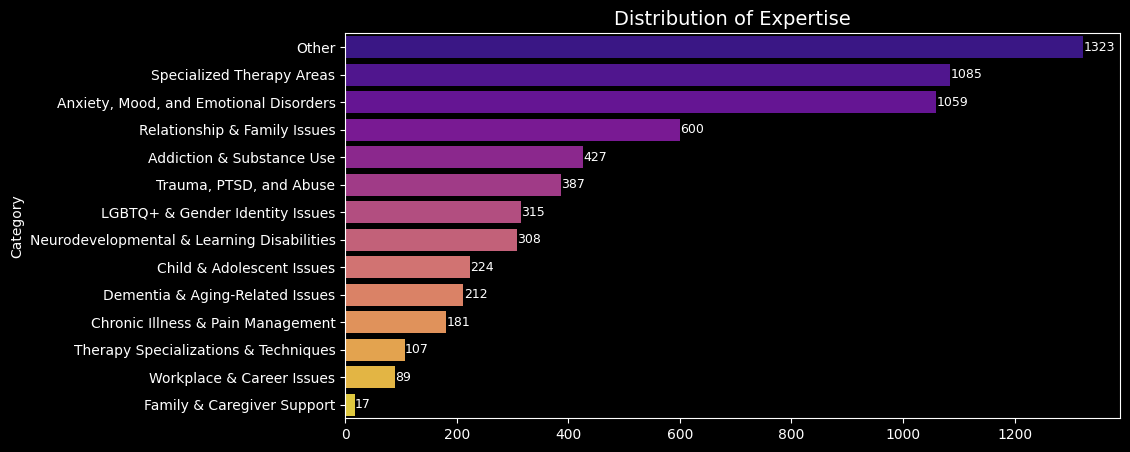

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
plot_horizontalBar(Expertise['Category'].value_counts(),"Distribution of Expertise")

Expertise[['Category','Expertise']].value_counts().sort_index().to_excel('Expertise.xlsx')
files.download('Expertise.xlsx')

### Top Specialties

In [50]:
top_specialties_list = Dementia['Top Specialties'].dropna().str.split('|').explode().str.strip()


top_specialties_groups = {
    "Anxiety, Mood, and Emotional Disorders": [
        "depression", "anxiety", "mood disorders", "bipolar disorder",
        "emotional disturbance", "thinking disorders", "psychosis",
        "borderline personality (bpd)", "stress"
    ],
    "Trauma, PTSD, and Abuse": [
        "trauma and ptsd", "sexual abuse", "domestic violence",
        "leaving religion/religious trauma", "psychological / forensic evaluations for court"
    ],
    "Relationship & Family Issues": [
        "relationship issues", "family conflict", "marital and premarital",
        "infidelity", "family of origin issues", "divorce"
    ],
    "LGBTQ+ & Gender Identity Issues": [
        "lgbtq+", "transgender", "multicultural + intergenerational issues"
    ],
    "Addiction & Substance Use": [
        "addiction", "substance use", "sexual addiction", "dual diagnosis"
    ],
    "Child & Adolescent Issues": [
        "child", "child or adolescent", "parenting", "school issues",
        "education and learning disabilities", "oppositional defiance (odd)"
    ],
    "Neurodevelopmental & Learning Disabilities": [
        "adhd", "autism", "adhd / autism / diagnostic evaluations",
        "testing and evaluation", "developmental disorders"
    ],
    "Dementia & Aging-Related Issues": [
        "dementia", "geriatric and seniors", "aging", "traumatic brain injury (tbi)"
    ],
    "Chronic Illness & Pain Management": [
        "chronic illness", "chronic pain", "obesity"
    ],
    "Career & Life Coaching": [
        "career counseling", "life transitions", "life coaching"
    ],
    "Therapy Specializations & Techniques": [
        "spirituality", "sex therapy", "sex-positive, kink allied",
        "ketamine assisted psychotherapy", "psychedelic therapy integration"
    ],
    "Veterans & Military Issues": [
        "veterans", "military issues"
    ],
    "Grief & Caregiver Support": [
        "grief", "caregivers", "pet loss", "pregnancy, prenatal, postpartum"
    ]
}


Top_specialties = pd.DataFrame({"Top_specialties": top_specialties_list})


categories = []

for i in top_specialties_list:
    category_found = "Other"
    for category, keywords in top_specialties_groups.items():
        if i in keywords:
            category_found = category
            break
    categories.append(category_found)


Top_specialties["Category"] = categories



<ipython-input-23-13b55a261e82>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


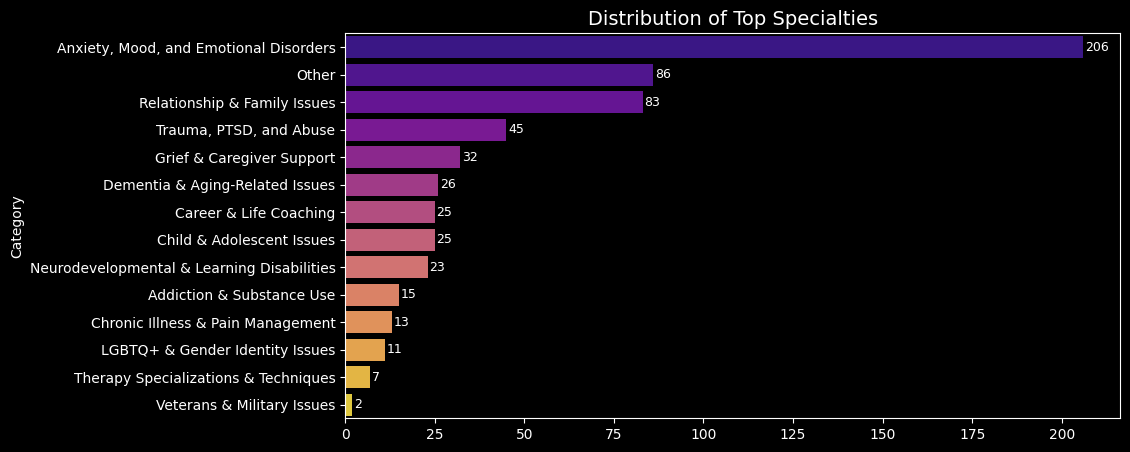

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
plot_horizontalBar(Top_specialties['Category'].value_counts(),"Distribution of Top Specialties")

Top_specialties[['Category','Top_specialties']].value_counts().sort_index().to_excel('Top_specialties.xlsx')
files.download('Top_specialties.xlsx')

### Types of Therapy

<ipython-input-100-f421bec1e104>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


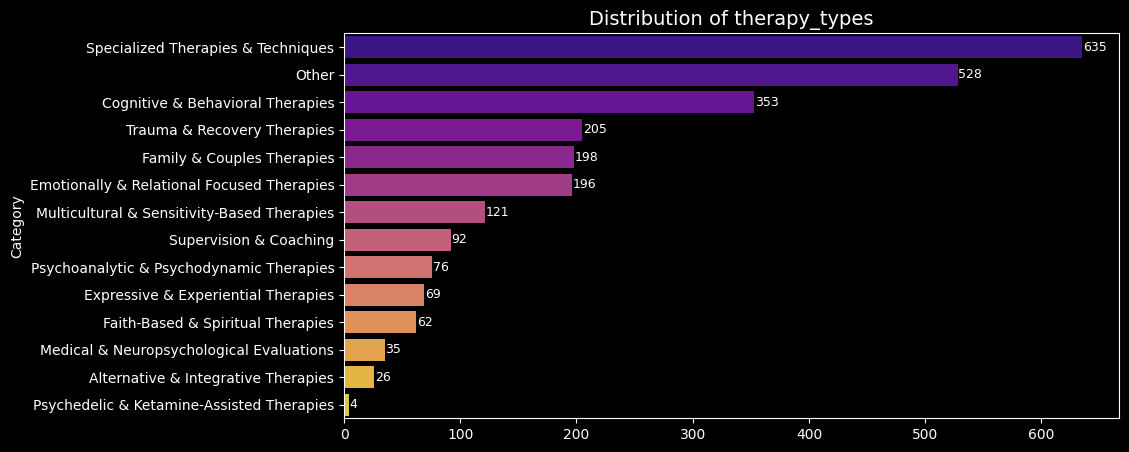

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
therapy_types_list = Dementia['Types of Therapy'].dropna().str.split('|').explode().str.strip()


therapy_types_groups = {
    "Cognitive & Behavioral Therapies": [
        "cognitive behavioral (cbt)", "dialectical behavior (dbt)", "acceptance and commitment (act)",
        "rational emotive behavior (rebt)", "cognitive processing therapy (cpt)",
        "cognitive processing (cpt)", "cognitive rehabilitation", "exposure response prevention (erp)",
        "schema therapy", "cognitive processing therapy (cpt) for ptsd"
    ],
    "Emotionally & Relational Focused Therapies": [
        "emotionally focused", "emotionally focused couple therapy",
        "emotionally focused therapy (eft)", "attachment-based", "gottman method", "imago",
        "relational", "pact(psychobiological approach to couples therapy)",
        "psychobiological approach couple therapy"
    ],
    "Trauma & Recovery Therapies": [
        "trauma focused", "emdr", "brainspotting", "prolonged exposure therapy",
        "equine therapy, emdr", "accelerated resolution therapy (art)", "internal family systems (ifs)",
        "sandplay", "dreamwork, shamanic, depth psychology", "complicated grief therapy (cgt)"
    ],
    "Family & Couples Therapies": [
        "family / marital", "family systems", "structural family therapy",
        "strategic family therapy", "bowen family systems", "couples and family therapy, in-home hoarding"
    ],
    "Expressive & Experiential Therapies": [
        "art therapy", "music therapy", "dance movement therapy", "expressive arts",
        "play therapy", "clay therapy", "sand tray"
    ],
    "Faith-Based & Spiritual Therapies": [
        "christian counseling", "faith-based", "faith based", "faith based therapy - upon request",
        "forgiveness and compassion therapy", "logotherapy", "spirituality", "liberation psychology",
        "decolonial anti-oppressive therapy"
    ],
    "Psychoanalytic & Psychodynamic Therapies": [
        "psychoanalytic", "psychodynamic", "jungian", "transactional therapy"
    ],
    "Alternative & Integrative Therapies": [
        "hypnotherapy", "neurofeedback", "biofeedback", "energy psychology", "reiki",
        "animal assisted interventions", "animal assisted therapy", "mind/body integration",
        "breathing for stress reduction", "emotional transformation therapy", "equine-assisted psychotherapy"
    ],
    "Supervision & Coaching": [
        "clinical supervision and licensed supervisors", "coaching", "life coaching",
        "therapeutic parenting skills, parent coaching"
    ],
    "Multicultural & Sensitivity-Based Therapies": [
        "multicultural", "culturally sensitive", "evaluaciones de inmigracion", "immigration evaluations"
    ],
    "Medical & Neuropsychological Evaluations": [
        "psychological testing and evaluation", "psychological evaluation",
        "comprehensive diagnostic evaluation services", "neuro-linguistic (nlp)",
        "adhd testing", "neuropsychological evaluations", "medication management",
        "vocational interest testing", "comprehensive behavioral intervention for tics"
    ],
    "Specialized Therapies & Techniques": [
        "cdwf (certified daring way facilitator)", "supportive", "reality therapy",
        "restoration therapy", "client-centered therapy", "solution focused brief (sfbt)",
        "strength-based", "compassion focused", "positive psychology", "mindfulness-based (mbct)",
        "existential", "adlerian", "adlerian and child-centered play therapy", "integrative",
        "experiential therapy", "humanistic", "collaborative language", "collaborative therapy"
    ],
    "Psychedelic & Ketamine-Assisted Therapies": [
        "ketamine-assisted", "ketamine assisted psychotherapy", "psychedelic therapy integration",
        "mycs neurological integrative therapy"
    ]
}



therapy_types = pd.DataFrame({"therapy_types": therapy_types_list})


categories = []

for exp in therapy_types_list:
    category_found = "Other"
    for category, keywords in therapy_types_groups.items():
        if exp in keywords:
            category_found = category
            break
    categories.append(category_found)


therapy_types["Category"] = categories



plot_horizontalBar(therapy_types['Category'].value_counts(),"Distribution of therapy_types")

therapy_types[['Category','therapy_types']].value_counts().sort_index().to_excel('therapy_types.xlsx')
files.download('therapy_types.xlsx')

### Session charges and Years of Practise

<ipython-input-82-207f77e4950f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


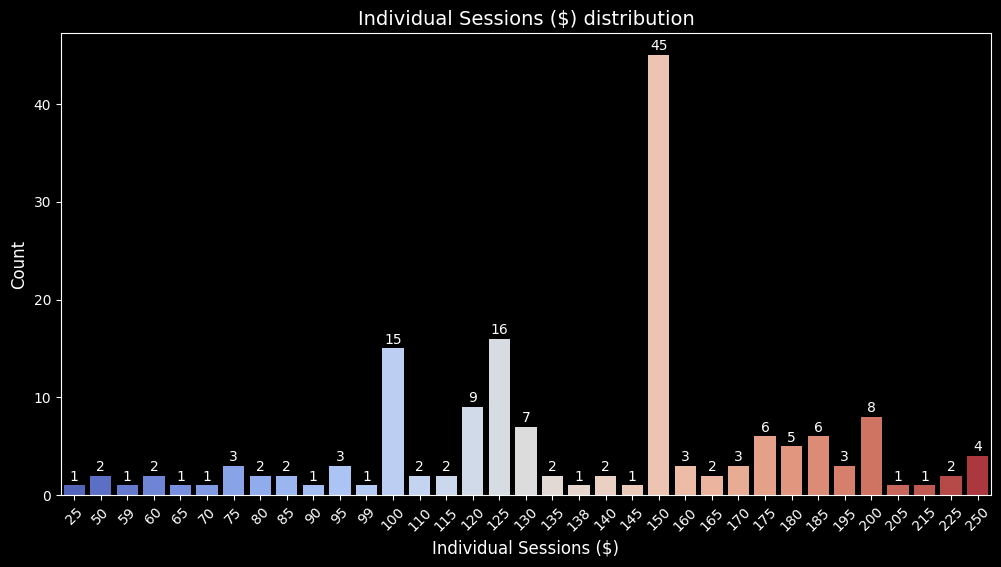

<ipython-input-82-207f77e4950f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


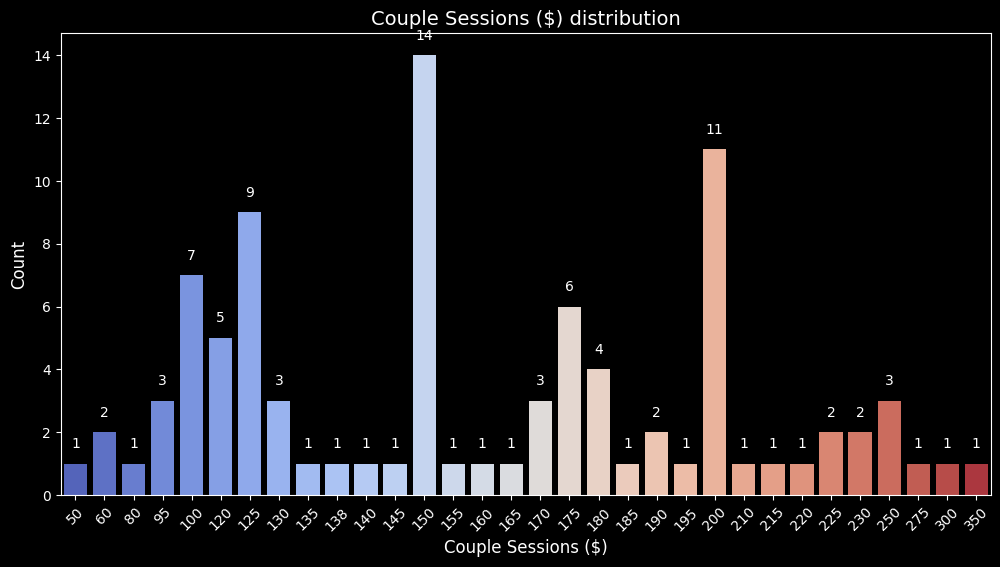

<ipython-input-82-207f77e4950f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


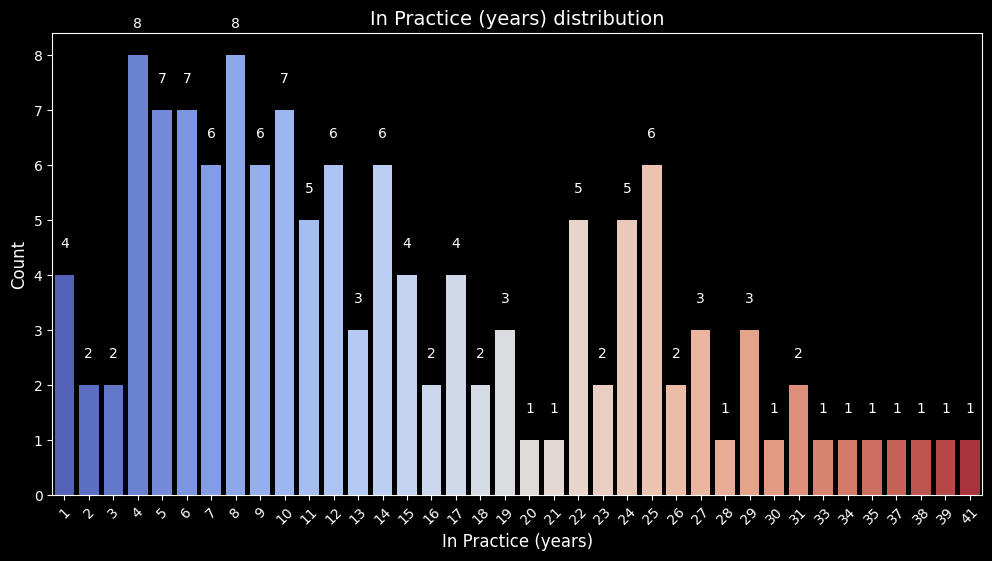

<ipython-input-82-207f77e4950f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


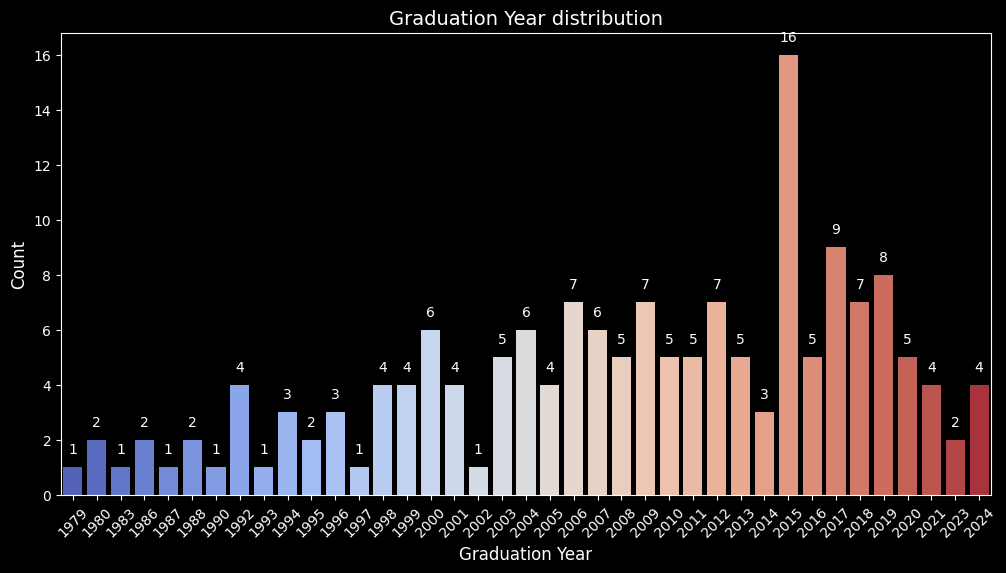

In [87]:
plot_count_distribution(Dementia, 'Individual Sessions ($)', 'Individual Sessions ($) distribution')
plot_count_distribution(Dementia, 'Couple Sessions ($)', 'Couple Sessions ($) distribution')
plot_count_distribution(Dementia, 'In Practice (years)', 'In Practice (years) distribution')
plot_count_distribution(Dementia, 'Graduation Year', 'Graduation Year distribution')

### Certifications

<ipython-input-100-f421bec1e104>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


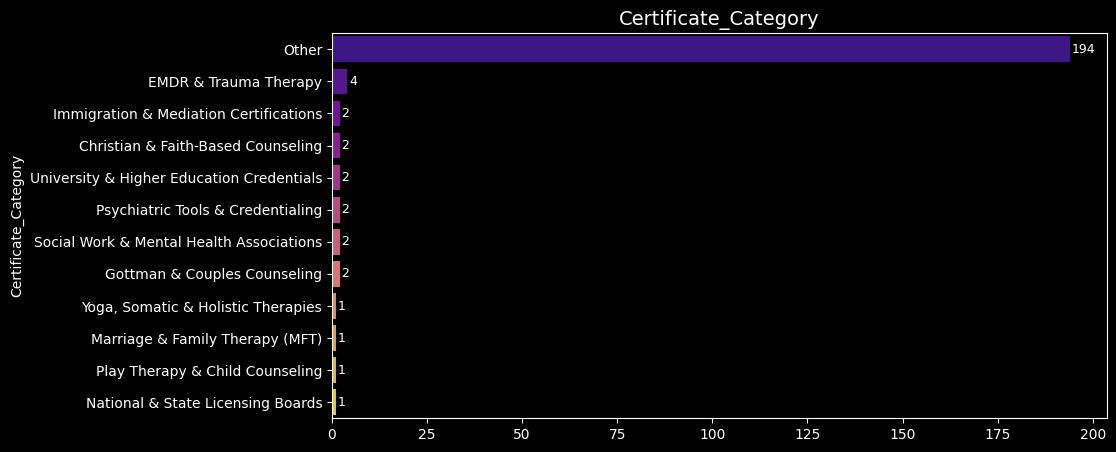

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
Dementia['Certificate_clean']=Dementia['Certificate'].str.split('/').str[0]
Dementia['Certificate_clean'] = Dementia['Certificate_clean'].str.replace(r'[\d,]', '', regex=True)  # Remove numbers and commas


# Define mapping of certifications to broader categories
certificate_groups = {
    "Marriage & Family Therapy (MFT)": [
        "aamft", "aamftmft supervisor", "american assoc. for marriage and family therapists"
    ],
    "EMDR & Trauma Therapy": [
        "emdria", "emdr association", "emdr therapy basic training", "emdria international association",
        "emdr and brainspotting trained", "brainspotting", "certified clinical trauma professional",
        "postpartum support internationalperinatal mental health"
    ],
    "Gottman & Couples Counseling": [
        "the gottman institute: gottman method couples therapy level &", "gottman level  trained therapist",
        "prepare-enrich curriculum facilitator"
    ],
    "Christian & Faith-Based Counseling": [
        "american association of christian counselors", "christian association for psychological studies",
        "church of the nazareneordained minister", "evangelical lutheran church in americaretired clergy"
    ],
    "Immigration & Mediation Certifications": [
        "mediators of texas", "immigration evaluation certfification", "alternative dispute resolution"
    ],
    "National & State Licensing Boards": [
        "state of texaslcdc", "texaslpc", "tx state board of examiners of professnl counselor",
        "texas counseling association#", "state board of health", "tx state board of social worker examinerslcsw-s",
        "texas state board of examiners of psychologists", "texas department of state health serviceslcdc",
        "texas education agencytx ceritified school counselor", "texas state board of examiners of lpcsapproved state supervisor"
    ],
    "Social Work & Mental Health Associations": [
        "nasw", "nasw association", "american board of clinical social work",
        "national board for certified counselors", "national board for certified counselors inc.",
        "national board of certified counselors", "national certified counselor-nbcc",
        "national council of certified dementia practitionerscdp", "professional counselor - supervisor"
    ],
    "University & Higher Education Credentials": [
        "southern methodist universitym.s. in counseling", "loyola university of chicagomaster of arts in psychology",
        "capella universitygeriatric psychology", "argosy university dallasdoctorate in clinical psycholo",
        "walden universityphd. clinical psychology", "prairie view a&m universitycertified school counselor",
        "university of houston graduate college social workm.s.w.", "universidad europea miguel de cervantesneuropsychology-dementia",
        "attendedregis college post-master's certificate graduated", "east texas baptist univ."
    ],
    "Play Therapy & Child Counseling": [
        "hcc-texas association for play therapy", "association for play therapy united statest"
    ],
    "Yoga, Somatic & Holistic Therapies": [
        "registered yoga teacher - yoga alliance", "somatic experiencing institute",
        "institute for aerobics researchphysical fitness specialist"
    ],
    "Psychiatric Tools & Credentialing": [
        "cpr & aed", "asha certificate of clinical competence", "bciae", "ccsas", "psypact", "laban"
    ],
    "Dementia & Geriatric Specializations": [
        "universidad europea miguel de cervantesneuropsychology-dementia", "national council of certified dementia practitionerscdp"
    ],
    "Other": []  # This will be used as a fallback category for unclassified values
}

certification_mapping = {title: category for category, titles in certificate_groups.items() for title in titles}


Dementia['Certificate_Category'] = Dementia['Certificate_clean'].map(certification_mapping).fillna("Other")


plot_horizontalBar(Dementia['Certificate_Category'].value_counts(),"Certificate_Category")

Dementia[['Certificate_Category','Certificate_clean']].value_counts().sort_index().to_excel('Certificate_Category.xlsx')
files.download('Certificate_Category.xlsx')


### Adding county, city

In [117]:
# Initialize the geocoder for US ZIP codes
nomi = pgeocode.Nominatim('us')

# Function to fetch city and county from ZIP Code
def get_location_info(zip_code):
    location = nomi.query_postal_code(zip_code)
    return pd.Series([location['place_name'], location['county_name']])

Dementia[['City', 'County']] = Dementia['ZIP Code'].astype(str).apply(get_location_info)

<ipython-input-100-f421bec1e104>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


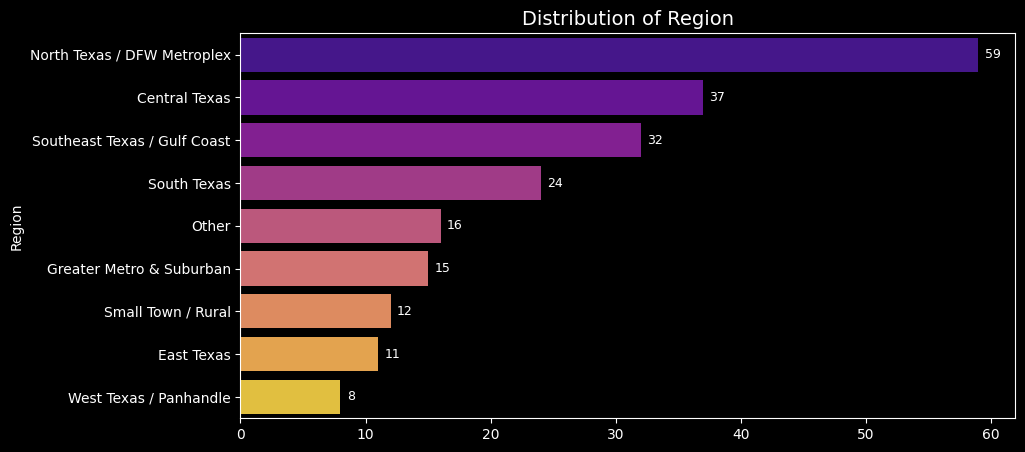

In [123]:

city_groups = {
    "Central Texas": [
        "Austin", "Round Rock", "Georgetown", "Pflugerville", "Cedar Park",
        "Hutto", "Bastrop", "Marble Falls"
    ],
    "North Texas / DFW Metroplex": [
        "Dallas", "Fort Worth", "Arlington", "Plano", "Frisco", "Allen",
        "McKinney", "Addison", "Carrollton", "Irving", "North Richland Hills",
        "Flower Mound", "Keller", "Southlake", "Colleyville", "Hurst", "Wylie",
        "Denton", "Burleson", "Prosper"
    ],
    "South Texas": [
        "San Antonio", "Corpus Christi", "Laredo", "McAllen", "Edinburg",
        "Harlingen", "Victoria"
    ],
    "West Texas / Panhandle": [
        "El Paso", "Amarillo", "Abilene", "Big Spring"
    ],
    "East Texas": [
        "Tyler", "Palestine", "Jacksonville", "Conroe", "Livingston"
    ],
    "Southeast Texas / Gulf Coast": [
        "Houston", "Pasadena", "Beaumont", "Alvin", "Manvel", "League City", "Winnie"
    ],
    "Greater Metro & Suburban": [
        "Spring", "Tomball", "Katy", "Richmond", "Magnolia", "Rockwall",
        "Kaufman", "Granbury", "Gunter"
    ],
    "Small Town / Rural": [
        "Cuero", "Bryan", "Belton", "Fredericksburg", "Sherman", "Weatherford",
        "Kyle", "Boerne"
    ]
}


city_mapping = {city: region for region, cities in city_groups.items() for city in cities}


Dementia["Region"] = Dementia["City"].map(city_mapping).fillna("Other")

plot_horizontalBar(Dementia['Region'].value_counts(),"Distribution of Region")
